#Part 2

##In this part, use KDD Cup 1999 dataset

Import the required libraries:

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
import seaborn as sns

###a)


Load the dataset:

Which shows 39 columns and 494021 rows.

In [19]:
df = pd.read_csv('KDD.csv')

View the dataset:

View the dataset which must show 38 input feature variables and 1 target (marked as target on .csv file provided) variable Obtain input feature variables as X and target variable as Y.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 39 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   src_bytes                    494021 non-null  int64  
 2   dst_bytes                    494021 non-null  int64  
 3   land                         494021 non-null  int64  
 4   wrong_fragment               494021 non-null  int64  
 5   urgent                       494021 non-null  int64  
 6   hot                          494021 non-null  int64  
 7   num_failed_logins            494021 non-null  int64  
 8   logged_in                    494021 non-null  int64  
 9   num_compromised              494021 non-null  int64  
 10  root_shell                   494021 non-null  int64  
 11  su_attempted                 494021 non-null  int64  
 12  num_root                     494021 non-null  int64  
 13 

In [21]:
df.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,181,5450,0,0,0,0,0,1,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,0
1,0,239,486,0,0,0,0,0,1,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0
2,0,235,1337,0,0,0,0,0,1,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
3,0,219,1337,0,0,0,0,0,1,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
4,0,217,2032,0,0,0,0,0,1,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0


Extract input feature variables (X) and target variable (Y):

In [22]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

Normalize X using MinMaxScaler:
Normalize X using MinMaxScaler from sklearn library.

In [23]:
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

In [24]:
X_normalized

array([[0.00000000e+00, 2.61041764e-07, 1.05713002e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.44690506e-07, 9.42688423e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.38921627e-07, 2.59336301e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 2.92770597e-07, 2.32762574e-04, ...,
        1.00000000e-02, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 4.19685930e-07, 2.32762574e-04, ...,
        1.00000000e-02, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.15846112e-07, 2.39357513e-04, ...,
        1.00000000e-02, 0.00000000e+00, 0.00000000e+00]])

Compute filter-based feature selection algorithm to reduce the number of feature variables to 10:

Compute filter-based feature selection algorithm on dataset by reducing the
number of feature variables to 10 (i.e. 9 input feature variables + 1 target
variable) from 39 columns and show the first five rows again and name this
dataset as my data comprising 10 feature variables.

In [25]:
selector = SelectKBest(score_func=f_classif, k=9)
X_selected = selector.fit_transform(X_normalized, Y)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [16 17] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Create a new DataFrame with the selected features:

In [26]:
# Select 10 feature variables (9 input features + 1 target variable)
selector = SelectKBest(score_func=f_classif, k=9)
X_selected = selector.fit_transform(X_normalized, Y)
selected_feature_names = X.columns[selector.get_support()].tolist()
selected_feature_names.append('target')

# Concatenate the target variable with the selected features
target_column = Y.to_frame(name='target')
my_data = pd.DataFrame(np.concatenate([X_selected, target_column], axis=1), columns=selected_feature_names)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [16 17] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Show the first five rows of the new dataset (my data):

In [27]:
my_data.head()

,logged_in,count,srv_count,serror_rate,same_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_same_src_port_rate,dst_host_srv_serror_rate,target
0,1.0,0.015656,0.015656,0.0,1.0,0.0,0.035294,0.11,0.0,0.0
1,1.0,0.015656,0.015656,0.0,1.0,0.0,0.074510,0.05,0.0,0.0
2,1.0,0.015656,0.015656,0.0,1.0,0.0,0.113725,0.03,0.0,0.0
3,1.0,0.011742,0.011742,0.0,1.0,0.0,0.152941,0.03,0.0,0.0
4,1.0,0.011742,0.011742,0.0,1.0,0.0,0.192157,0.02,0.0,0.0


### b)

Split the data into three subsets with different train-test ratios:

Use sklearn to split my data using train test split into three subsets,
for instance, my data 1 with 70% train & 30% test data, my data 2
with 60%train & 40% test data, my data 3 with 50%train & 50%
test data

In [28]:
# my data 1: 70% train & 30% test
X_train1, X_test1, y_train1, y_test1 = train_test_split(my_data.iloc[:, :-1], my_data.iloc[:, -1], test_size=0.3, random_state=42)

# my data 2: 60% train & 40% test
X_train2, X_test2, y_train2, y_test2 = train_test_split(my_data.iloc[:, :-1], my_data.iloc[:, -1], test_size=0.4, random_state=42)

# my data 3: 50% train & 50% test
X_train3, X_test3, y_train3, y_test3 = train_test_split(my_data.iloc[:, :-1], my_data.iloc[:, -1], test_size=0.5, random_state=42)

Create and fit a Decision Tree classifier on each subset:

Compute the performance of Decision tree in terms of classification report for each subsets.

In [29]:
# Decision Tree classifier
clf = DecisionTreeClassifier()

# Fit the classifier on my data 1
clf.fit(X_train1, y_train1)

# Make predictions and evaluate performance for my data 1
y_pred1 = clf.predict(X_test1)
report1 = classification_report(y_test1, y_pred1)

# Fit the classifier on my data 2
clf.fit(X_train2, y_train2)

# Make predictions and evaluate performance for my data 2
y_pred2 = clf.predict(X_test2)
report2 = classification_report(y_test2, y_pred2)

# Fit the classifier on my data 3
clf.fit(X_train3, y_train3)

# Make predictions and evaluate performance for my data 3
y_pred3 = clf.predict(X_test3)
report3 = classification_report(y_test3, y_pred3)

Print the classification report for each subset:

In [30]:
print("Classification Report for my data 1:")
print(report1)

Classification Report for my data 1:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98     29192
         1.0       1.00      0.99      0.99    119015

    accuracy                           0.99    148207
   macro avg       0.98      0.99      0.99    148207
weighted avg       0.99      0.99      0.99    148207



In [31]:
print("\nClassification Report for my data 2:")
print(report2)



Classification Report for my data 2:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98     38977
         1.0       1.00      0.99      0.99    158632

    accuracy                           0.99    197609
   macro avg       0.98      0.99      0.99    197609
weighted avg       0.99      0.99      0.99    197609



In [32]:
print("\nClassification Report for my data 3:")
print(report3)


Classification Report for my data 3:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98     48650
         1.0       1.00      0.99      0.99    198361

    accuracy                           0.99    247011
   macro avg       0.98      0.99      0.99    247011
weighted avg       0.99      0.99      0.99    247011



### c)

Visualize the best split of the Decision tree by considering Entropy as a
measure of node impurity and assuming parameters max depth=[4, 6, 8]
for each my data 1 with 70% train, my data 2 with 60%train and
my data 3 with 50%train data as asked in (b).

[NOTE: Make sure to also consider other parameters of Decision Tree which might improve the performance of classification]

Define a function to visualize the Decision Tree:

In [33]:
def visualize_decision_tree(X_train, y_train, max_depth):
    # Create and fit the Decision Tree classifier
    min_samples_split = 10
    min_samples_leaf = 5
    max_features = 0.8
    max_depth = 10
    criterion = 'entropy'
    clf = DecisionTreeClassifier(
    criterion=criterion,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    max_features=max_features
    )
    clf.fit(X_train, y_train)

    # Plot the Decision Tree
    plt.figure(figsize=(12, 8))
    plot_tree(clf, filled=True, rounded=True, feature_names=X_train.columns)
    plt.show()

Visualize the Decision Tree for each subset:

Visualize the Decision Tree for my data 1

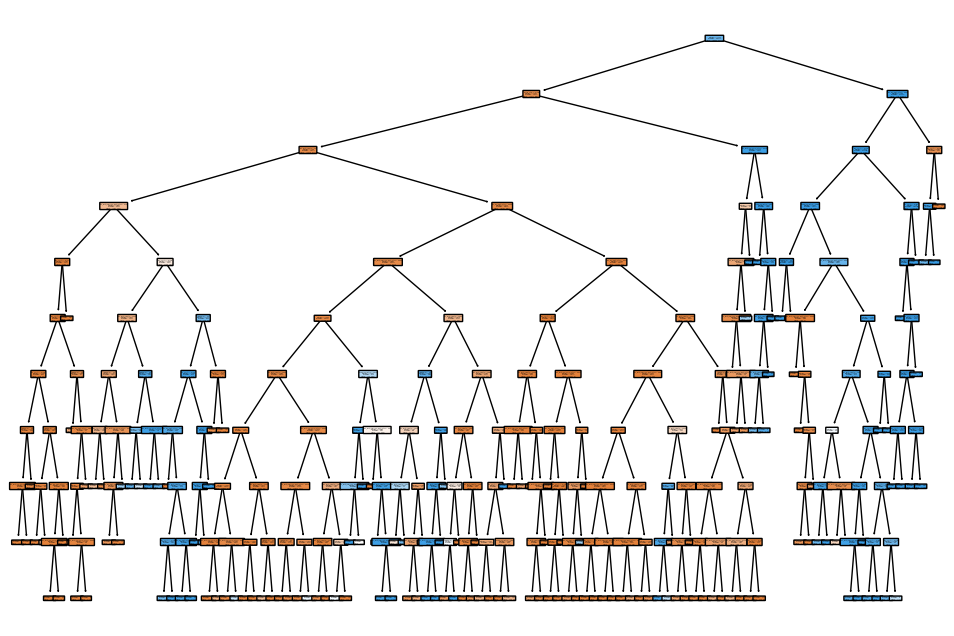

In [34]:
visualize_decision_tree(X_train1, y_train1, max_depth=4)

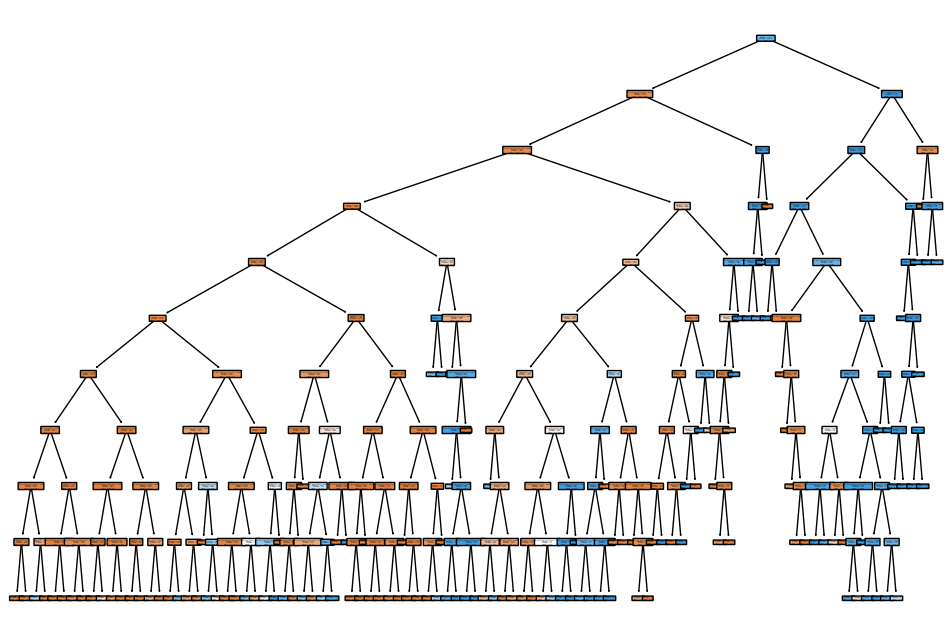

In [35]:
visualize_decision_tree(X_train1, y_train1, max_depth=6)

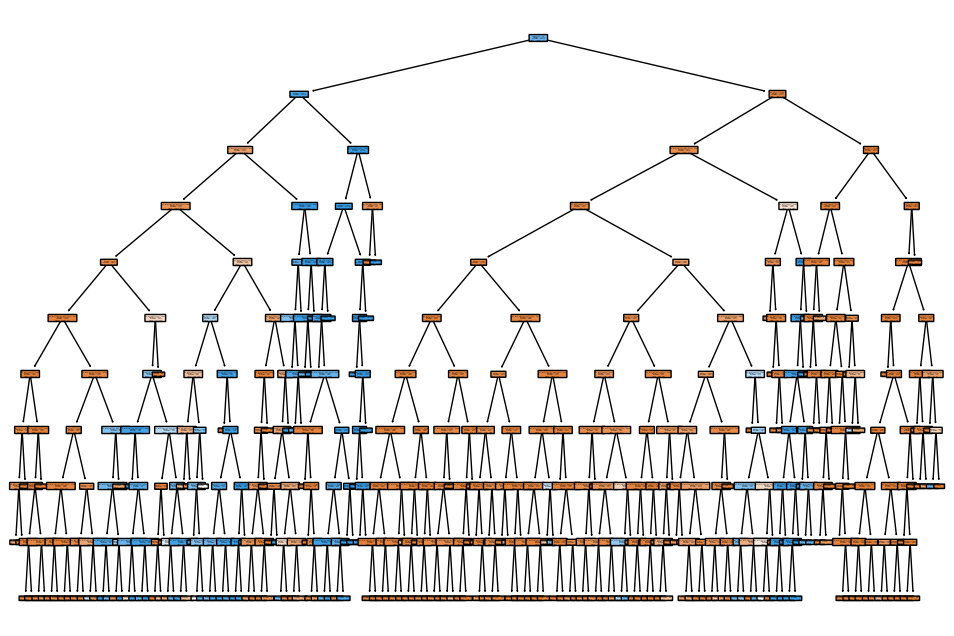

In [36]:
visualize_decision_tree(X_train1, y_train1, max_depth=8)

Visualize the Decision Tree for my data 2

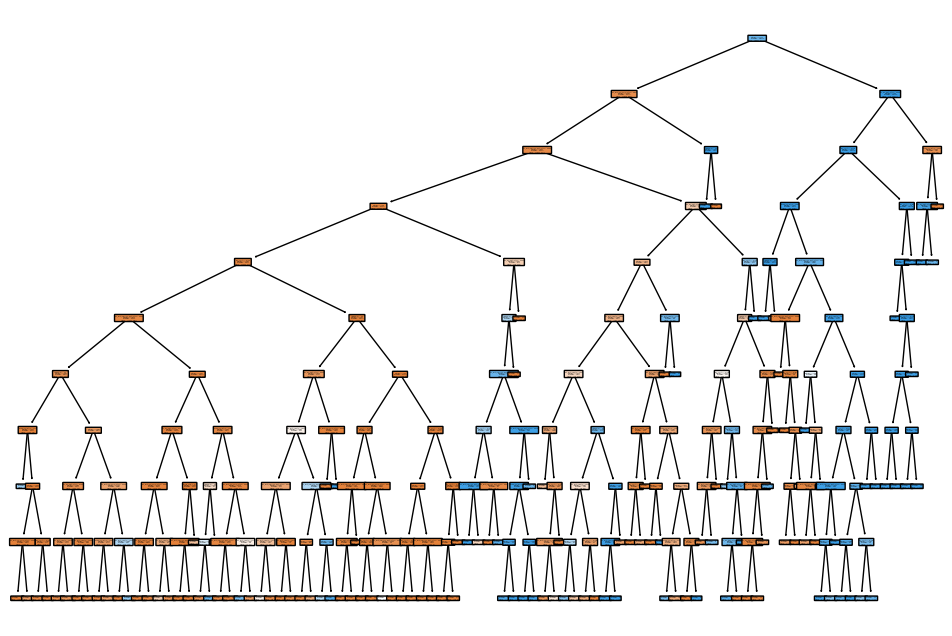

In [37]:
visualize_decision_tree(X_train2, y_train2, max_depth=4)

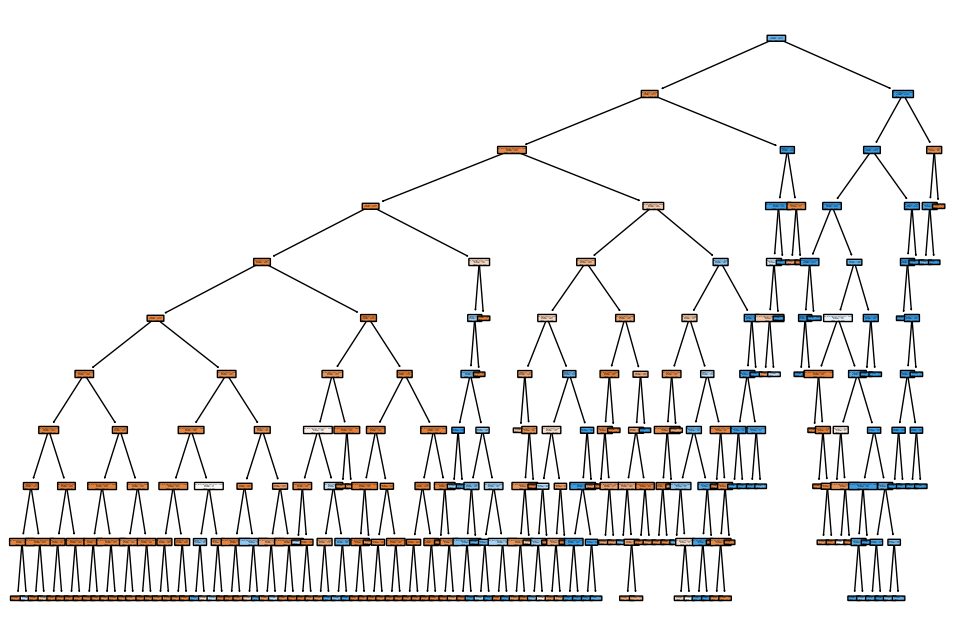

In [38]:
visualize_decision_tree(X_train2, y_train2, max_depth=6)

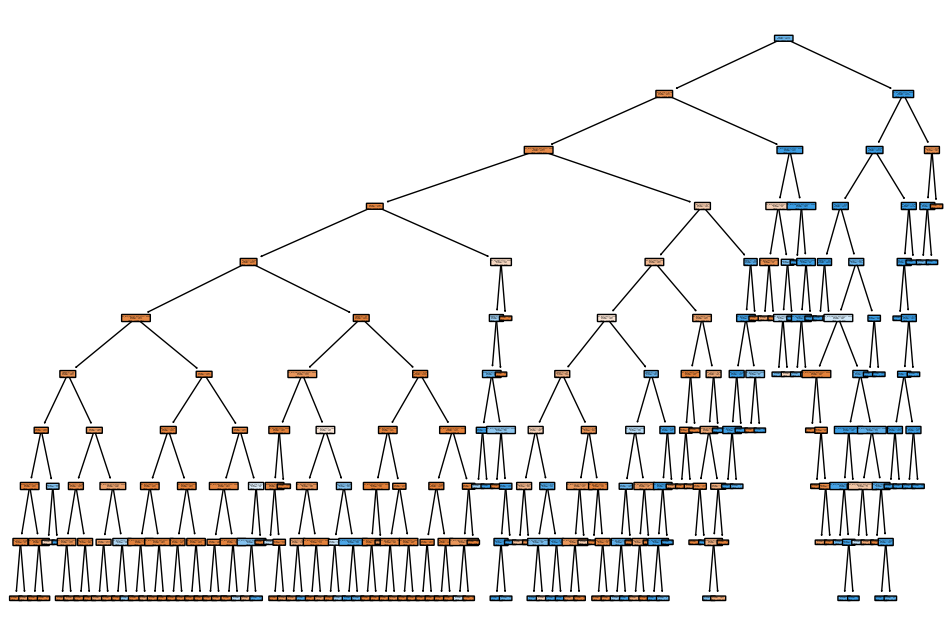

In [39]:
visualize_decision_tree(X_train2, y_train2, max_depth=8)

Visualize the Decision Tree for my data 3

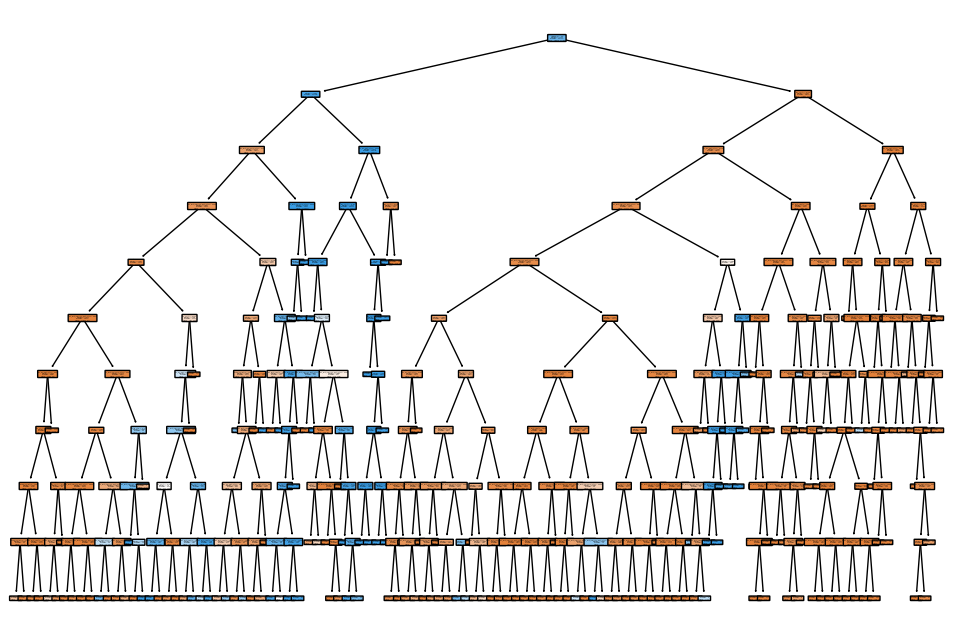

In [40]:
visualize_decision_tree(X_train3, y_train3, max_depth=4)

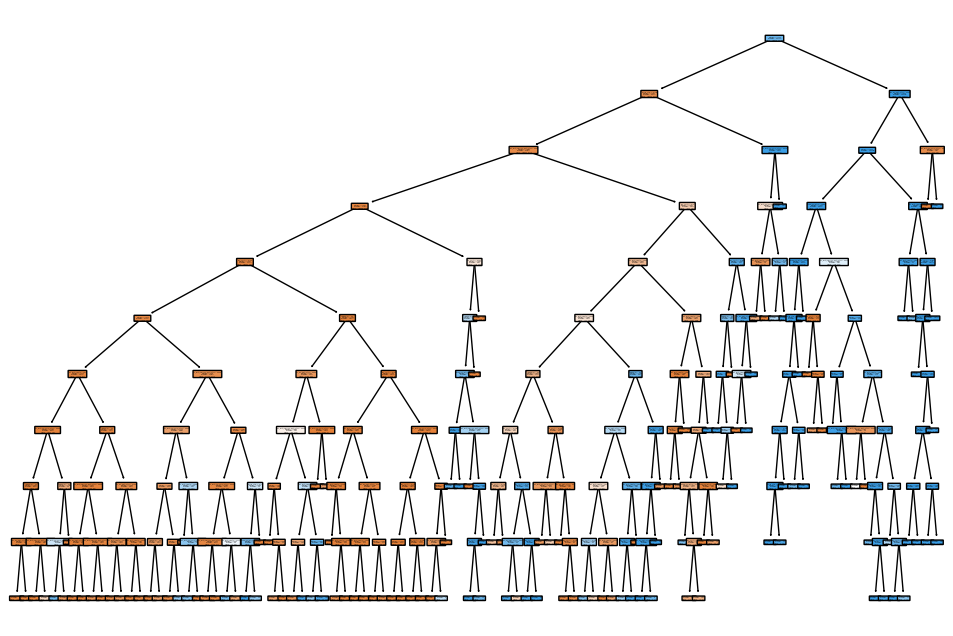

In [41]:
visualize_decision_tree(X_train3, y_train3, max_depth=6)

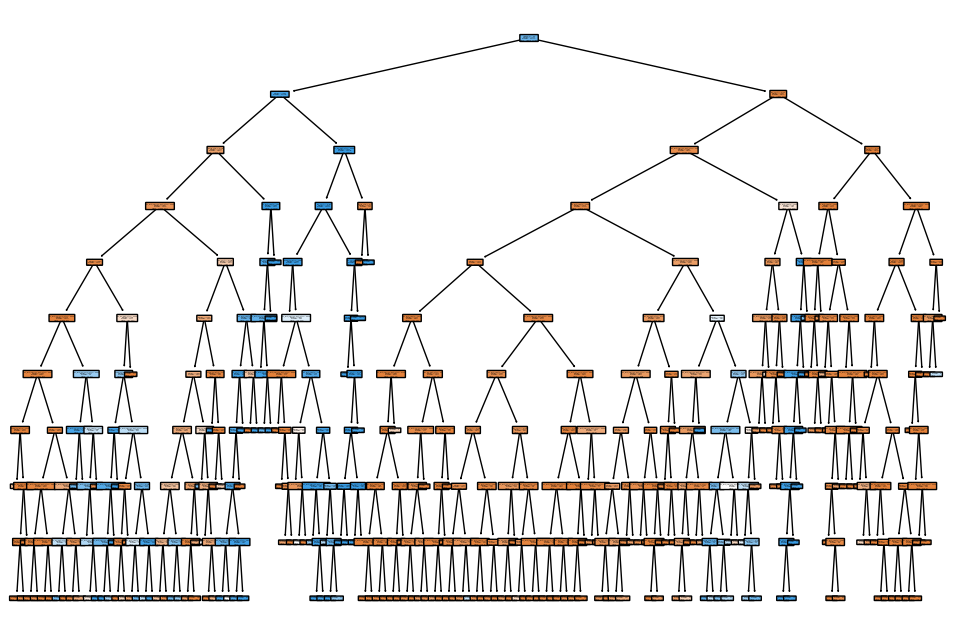

In [42]:
visualize_decision_tree(X_train3, y_train3, max_depth=8)

### d)

Compute and compare the classification performance of tuned Decision Tree
in (c) for each test size my data 1: 30% test data, my data 2: 40% test
data, my data 3: 50% test data in (b).

Display the accuracy scores,
classification report, and confusion matrix respectively.

Define a function to evaluate the performance of the Decision Tree:

In [43]:
def plot_confusion_matrix(cm, classes):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Add annotations to each cell
    thresh = cm.max() / 2.0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

def evaluate_decision_tree(X_train, y_train, X_test, y_test, max_depth):
    # Create and fit the Decision Tree classifier
    min_samples_split = 10
    min_samples_leaf = 5
    max_features = 0.8
    max_depth = 10
    criterion = 'entropy'
    clf = DecisionTreeClassifier(
    criterion=criterion,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    max_features=max_features
    )
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Compute the accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Print the accuracy score
    print("Accuracy Score:", accuracy)

    # Print the classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix with annotations
    plot_confusion_matrix(cm, classes=np.unique(y_test))
    plt.show()

Evaluate the performance of the Decision Tree for each test size:

Evaluate the Decision Tree for my data 1

Accuracy Score: 0.9905739944806925
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     29192
         1.0       1.00      0.99      0.99    119015

    accuracy                           0.99    148207
   macro avg       0.98      0.99      0.99    148207
weighted avg       0.99      0.99      0.99    148207



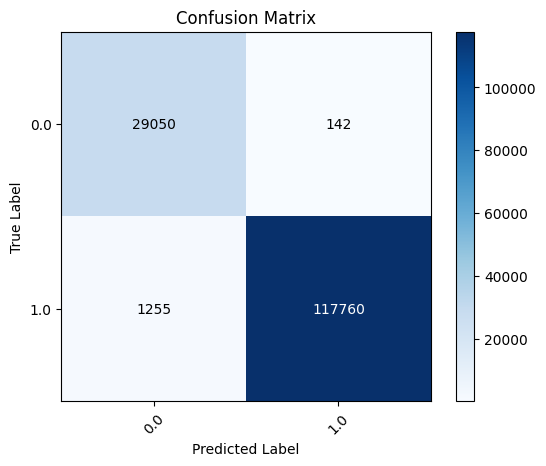

In [44]:
evaluate_decision_tree(X_train1, y_train1, X_test1, y_test1, max_depth=4)

Accuracy Score: 0.9901556606638013
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     29192
         1.0       1.00      0.99      0.99    119015

    accuracy                           0.99    148207
   macro avg       0.98      0.99      0.98    148207
weighted avg       0.99      0.99      0.99    148207



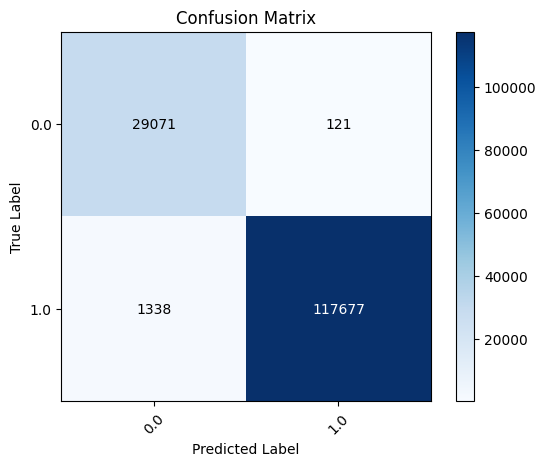

In [45]:
evaluate_decision_tree(X_train1, y_train1, X_test1, y_test1, max_depth=6)

Accuracy Score: 0.9907831613891381
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     29192
         1.0       1.00      0.99      0.99    119015

    accuracy                           0.99    148207
   macro avg       0.98      0.99      0.99    148207
weighted avg       0.99      0.99      0.99    148207



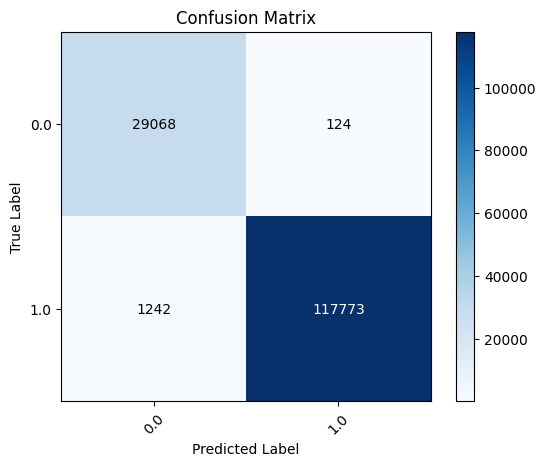

In [46]:
evaluate_decision_tree(X_train1, y_train1, X_test1, y_test1, max_depth=8)

Evaluate the Decision Tree for my data 2

Accuracy Score: 0.9911643700438745
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     38977
         1.0       1.00      0.99      0.99    158632

    accuracy                           0.99    197609
   macro avg       0.98      0.99      0.99    197609
weighted avg       0.99      0.99      0.99    197609



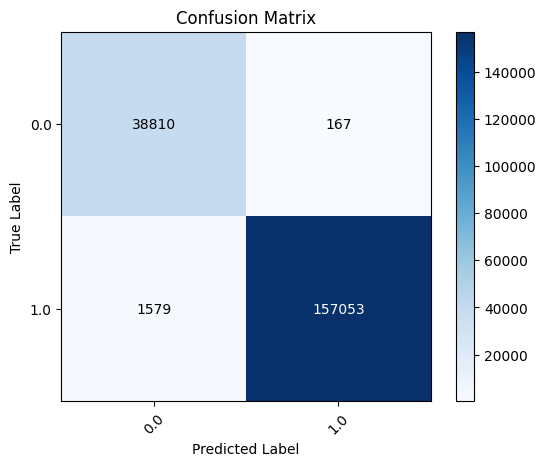

In [47]:
evaluate_decision_tree(X_train2, y_train2, X_test2, y_test2, max_depth=4)

Accuracy Score: 0.9899447899640199
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98     38977
         1.0       1.00      0.99      0.99    158632

    accuracy                           0.99    197609
   macro avg       0.98      0.99      0.98    197609
weighted avg       0.99      0.99      0.99    197609



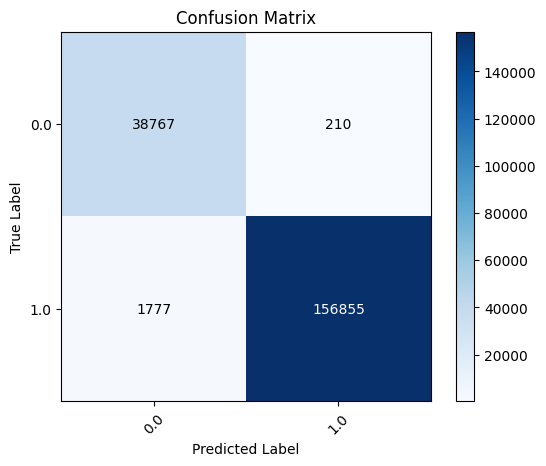

In [48]:
evaluate_decision_tree(X_train2, y_train2, X_test2, y_test2, max_depth=6)

Accuracy Score: 0.9908809821415017
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     38977
         1.0       1.00      0.99      0.99    158632

    accuracy                           0.99    197609
   macro avg       0.98      0.99      0.99    197609
weighted avg       0.99      0.99      0.99    197609



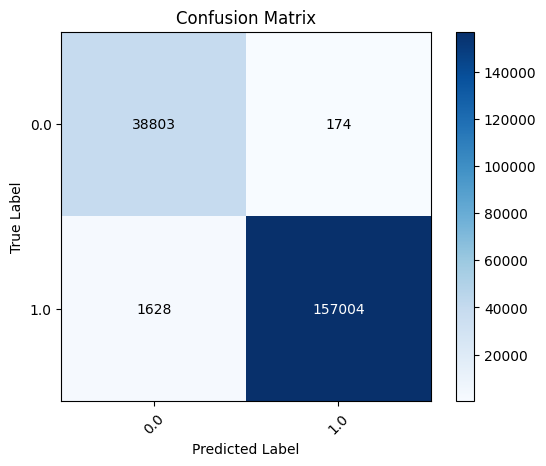

In [49]:
evaluate_decision_tree(X_train2, y_train2, X_test2, y_test2, max_depth=8)

Evaluate the Decision Tree for my data 3

Accuracy Score: 0.9904903020513256
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     48650
         1.0       1.00      0.99      0.99    198361

    accuracy                           0.99    247011
   macro avg       0.98      0.99      0.99    247011
weighted avg       0.99      0.99      0.99    247011



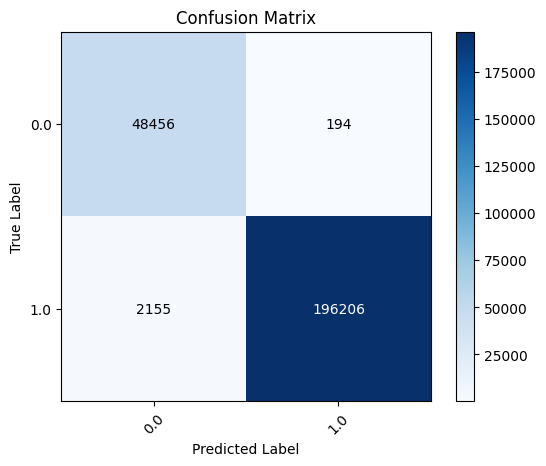

In [50]:
evaluate_decision_tree(X_train3, y_train3, X_test3, y_test3, max_depth=4)

Accuracy Score: 0.9906603349648396
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98     48650
         1.0       1.00      0.99      0.99    198361

    accuracy                           0.99    247011
   macro avg       0.98      0.99      0.99    247011
weighted avg       0.99      0.99      0.99    247011



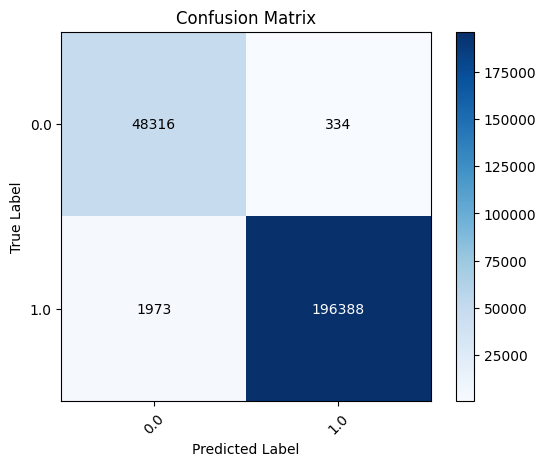

In [51]:
evaluate_decision_tree(X_train3, y_train3, X_test3, y_test3, max_depth=6)

Accuracy Score: 0.9911380464837598
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     48650
         1.0       1.00      0.99      0.99    198361

    accuracy                           0.99    247011
   macro avg       0.98      0.99      0.99    247011
weighted avg       0.99      0.99      0.99    247011



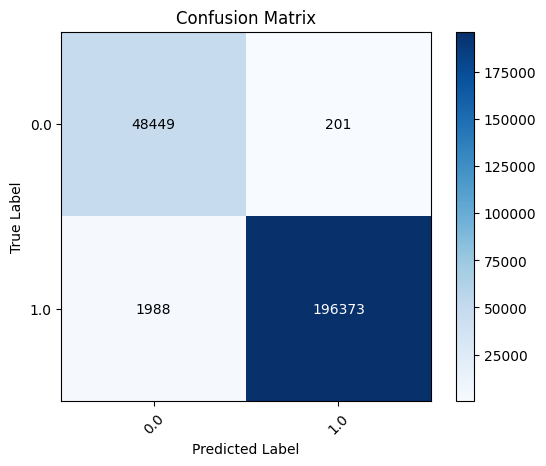

In [52]:
evaluate_decision_tree(X_train3, y_train3, X_test3, y_test3, max_depth=8)

### e)

Train a Decision Tree classifier on my data 1:

Train DecisionTree with parameters of your choice on my data 1 with
70% train & 30% test data in (b) and display the F1 scores for both train
and test data.

In [53]:
# Create the Decision Tree classifier
clf = DecisionTreeClassifier(max_depth=10)

# Train the classifier on my data 1
clf.fit(X_train1, y_train1)

# Make predictions on the train and test sets
y_train_pred = clf.predict(X_train1)
y_test_pred = clf.predict(X_test1)

# Compute the F1 score for train and test data
train_f1_score = f1_score(y_train1, y_train_pred)
test_f1_score = f1_score(y_test1, y_test_pred)

# Print the F1 scores
print("F1 Score for Train Data:", train_f1_score)
print("F1 Score for Test Data:", test_f1_score)

F1 Score for Train Data: 0.9947959235337089
F1 Score for Test Data: 0.9943828522956029


####Showcasing an issue of overfitting or overlearning

Apply pre-pruning to address overfitting:

In addition,
apply three mitigation strategies (1- pre-prunning)
to address the problem of overfitting and display the train
and test F1 scores showing an improvement

In [54]:
# Create the Decision Tree classifier with pre-pruning
clf_pre_pruned = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5)

# Train the classifier on my data 1
clf_pre_pruned.fit(X_train1, y_train1)

# Make predictions on the train and test sets
y_train_pred_pre_pruned = clf_pre_pruned.predict(X_train1)
y_test_pred_pre_pruned = clf_pre_pruned.predict(X_test1)

# Compute the F1 score for train and test data with pre-pruning
train_f1_score_pre_pruned = f1_score(y_train1, y_train_pred_pre_pruned)
test_f1_score_pre_pruned = f1_score(y_test1, y_test_pred_pre_pruned)

# Print the F1 scores with pre-pruning
print("\nF1 Score (with Pre-pruning) for Train Data:", train_f1_score_pre_pruned)
print("F1 Score (with Pre-pruning) for Test Data:", test_f1_score_pre_pruned)



F1 Score (with Pre-pruning) for Train Data: 0.9947108316742523
F1 Score (with Pre-pruning) for Test Data: 0.9943362144641772


Apply post-pruning to address overfitting:

In addition,
apply three mitigation strategies (2-post-prunning)
to address the problem of overfitting and display the train
and test F1 scores showing an improvement

In [55]:
# Create the Decision Tree classifier with post-pruning (using cost-complexity pruning)
clf_post_pruned = DecisionTreeClassifier(ccp_alpha=0.01)

# Train the classifier on my data 1
clf_post_pruned.fit(X_train1, y_train1)

# Make predictions on the train and test sets
y_train_pred_post_pruned = clf_post_pruned.predict(X_train1)
y_test_pred_post_pruned = clf_post_pruned.predict(X_test1)

# Compute the F1 score for train and test data with post-pruning
train_f1_score_post_pruned = f1_score(y_train1, y_train_pred_post_pruned)
test_f1_score_post_pruned = f1_score(y_test1, y_test_pred_post_pruned)

# Print the F1 scores with post-pruning
print("\nF1 Score (with Post-pruning) for Train Data:", train_f1_score_post_pruned)
print("F1 Score (with Post-pruning) for Test Data:", test_f1_score_post_pruned)



F1 Score (with Post-pruning) for Train Data: 0.9873992173562337
F1 Score (with Post-pruning) for Test Data: 0.9871038603603796


Apply k-fold cross-validation to address overfitting:

In addition,
apply three mitigation strategies (3-k-fold
cross validation)
to address the problem of overfitting and display the train
and test F1 scores showing an improvement

In [56]:
# Create the Decision Tree classifier for cross-validation
clf_cv = DecisionTreeClassifier(max_depth=10)

# Compute the cross-validated F1 scores
cv_scores = cross_val_score(clf_cv, X_train1, y_train1, cv=5, scoring='f1_macro')

# Compute the average F1 score across the cross-validation folds
avg_cv_score = np.mean(cv_scores)

# Print the cross-validated F1 score
print("\nCross-Validated F1 Score:", avg_cv_score)


Cross-Validated F1 Score: 0.9865415634808649
